In [32]:
import os
import glob
import gdown 
import zipfile
import shutil

def download_data(save_folder, dataset_name="salaries"):
    dataset_list = ["salaries", "exams", "college", "cars", "mall"]
    assert dataset_name in dataset_list, f"Choose one of the available datasets: {dataset_list}"

    file_ids = {
        "college": "1vwfMpQ4ikAI91zn1bWxP_Iqz7DTFUA9F",
        "salaries": "1p-XtX29fgXT9CzBfpHm3t8r028gQPRhe",
        "exams": "1TYN_sRmauaDgNYgQ-0VSHVAJvLoxKx2R",
        "cars": "1Fi5IPdfEktnKyf3dyHmnh84a2jiXl33A",
        "mall": "1eGWJVRNmGjfaH0o3dczBbNe_-RrW0_Jm",
    }

    file_id = file_ids[dataset_name]
    zip_path = os.path.join(save_folder, f"{dataset_name}.zip")
    csv_path = os.path.join(save_folder, f"{dataset_name}.csv")

    os.makedirs(save_folder, exist_ok=True)

    if os.path.isfile(csv_path):
        print(f"{dataset_name}.csv is already downloaded.")
        return

    print(f"⬇️ Downloading dataset: {dataset_name}...")

    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, zip_path, quiet=False)

    if not os.path.exists(zip_path):
        print("Error: ZIP file was not downloaded!")
        return
    if not zipfile.is_zipfile(zip_path):
        print("Error: The downloaded file is not a valid ZIP! Check the Google Drive link.")
        return

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(save_folder)

    os.remove(zip_path)

    extracted_files = glob.glob(os.path.join(save_folder, "*"))
    
    if not extracted_files:
        print("Error: No files were extracted! Check if the ZIP contains a subfolder.")
        return

    if len(extracted_files) == 1 and os.path.isdir(extracted_files[0]):
        extracted_files = glob.glob(os.path.join(extracted_files[0], "*"))

    csv_files = [f for f in extracted_files if f.endswith(".csv")]

    if not csv_files:
        print("Error: No CSV files found after extraction!")
        return

    latest_csv = max(csv_files, key=os.path.getctime)
    shutil.move(latest_csv, csv_path)

    print(f" {dataset_name}.csv successfully downloaded and saved.")

download_data("datasets", "college")
download_data("datasets", "exams")

college.csv is already downloaded.
exams.csv is already downloaded.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("datasets/exams.csv")


In [43]:
# Check data
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [44]:
print(df.columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [46]:
X = df.drop(columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course', 'reading score', 'writing score'])
y = df['math score']

In [48]:
print(X.head())  # Check the first few rows of X (features)
print(y.head())  # Check the first few rows of y (target)
print(X.shape, y.shape)  # Print the number of rows and columns


   math score
0          72
1          69
2          90
3          47
4          76
0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64
(1000, 1) (1000,)


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes after splitting
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(800, 1) (200, 1) (800,) (200,)


In [51]:
from sklearn.linear_model import LinearRegression


In [52]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Make predictions
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import r2_score, mean_squared_error


In [56]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R² Score: 1.0000
Mean Squared Error: 0.0000


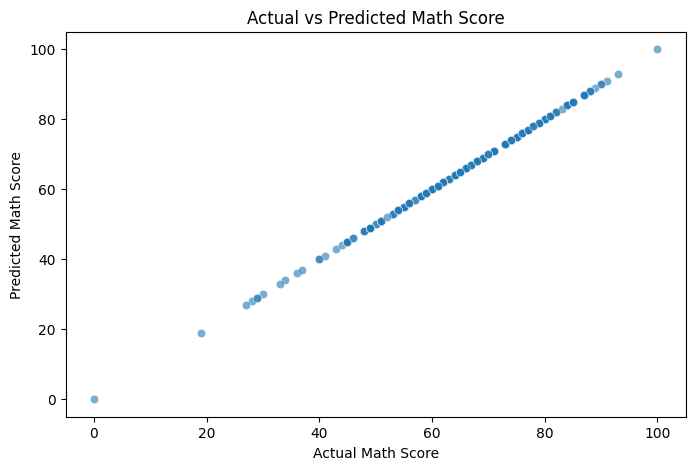

In [57]:
# Plot actual vs predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Score")
plt.show()

In [58]:
# 1️⃣ Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
df.columns = df.columns.str.strip()

In [60]:
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 
        'test preparation course', 'reading score', 'writing score']]
y = df['math score']

In [61]:
# 5️⃣ Identify categorical & numerical columns
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical_features = ['reading score', 'writing score']

In [62]:
# 6️⃣ Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical data
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Encode categorical data
    ]
)


In [63]:
# 7️⃣ Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# 8️⃣ Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}


In [74]:
# 9️⃣ Train and evaluate each model
results = {}  # Store results here

for name, model in models.items():
    print(f"🔄 Training {name}...")  # Debugging output
    
    try:
        # Create a pipeline for preprocessing + model
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(X_test)
        
        # Evaluate the model
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        
        # Store results
        results[name] = {"R² Score": r2, "MSE": mse}
        
        print(f"✅ {name} trained successfully!")  # Debugging output

    except Exception as e:
        print(f"❌ Error training {name}: {e}")  # Print errors if something goes wrong

    

🔄 Training Linear Regression...
✅ Linear Regression trained successfully!
🔄 Training Decision Tree...
✅ Decision Tree trained successfully!
🔄 Training Random Forest...
✅ Random Forest trained successfully!


In [75]:
# Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
    
results[name] = {"R² Score": r2, "MSE": mse}


In [76]:
# 🔟 Print the results
print("📊 Model Performance Comparison:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"   ✅ R² Score: {metrics['R² Score']:.4f}")
    print(f"   📉 Mean Squared Error: {metrics['MSE']:.4f}")

📊 Model Performance Comparison:

Linear Regression:
   ✅ R² Score: 0.8804
   📉 Mean Squared Error: 29.0952

Decision Tree:
   ✅ R² Score: 0.7107
   📉 Mean Squared Error: 70.3900

Random Forest:
   ✅ R² Score: 0.8496
   📉 Mean Squared Error: 36.6079
